# Training with Gradient Descent

### Introduction

In the last lesson, we saw that we can find the optimal weight, or parameter, for our hypothesis function, by trying different values for the parameter, and then choosing the parameter that minimized the sum of the squared errors.  

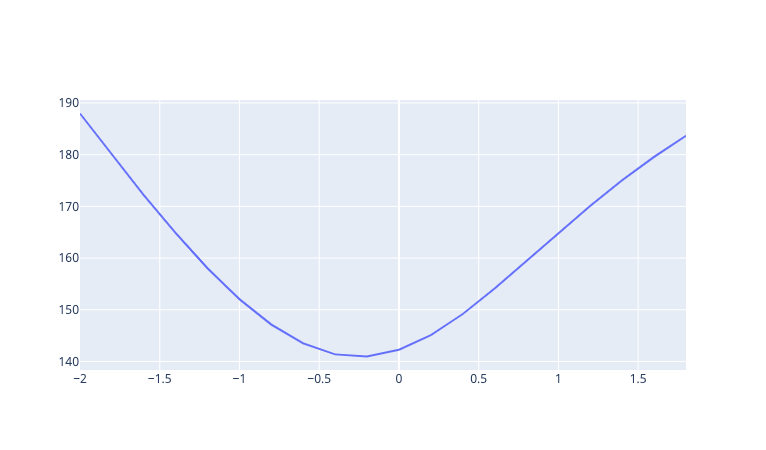

In [59]:
import json
import plotly.graph_objects as go
with open('cost_curve.json') as cost_file:
    data = json.load(cost_file)
cost_curve_fig = go.Figure(data)
cost_curve_fig

While this works technique of trying every potential weight and choosing the best one works ok when we have only one parameter to train, when we have hundreds to train for even a single neuron, simple trial and error will be too costly.  In this lesson, we'll develop a technique that will allow us to find a weight that minimizes our sum of squared errors, without trying every weight in a range.

### Improving our approach

Let's take another look at our cost curve.

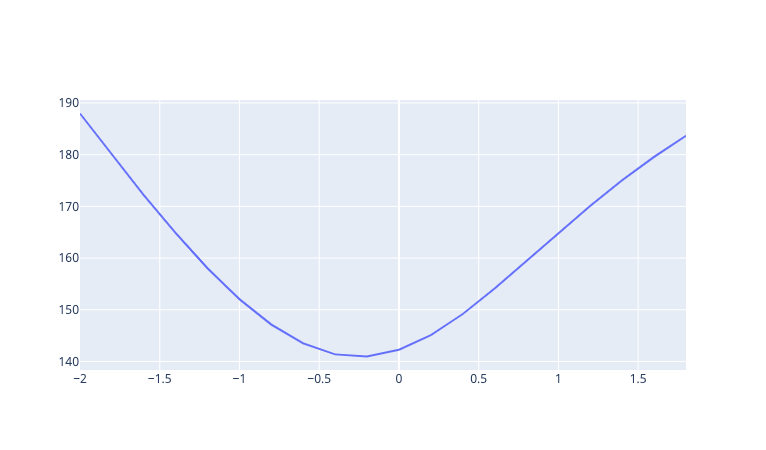

In [60]:
cost_curve_fig

Now as mentioned, when our we need to train an entire neural network, trying every single potential value for each weight will become impractical.  Instead, we need to find a more efficient approach to find the minimum - an approach that does not involve trying every point.  

> FAQ: For those of you thinking, "let's just find where the derivative of the cost curve equals zero".  That approach will not work either when we try to find the minimum of a cost curve that depends on thousands of parameters.

To avoid trying every parameter, there is an important feature of the cost curve that we can take advantage of.  Take a look at the graph below, including the legend to the right of the plot.

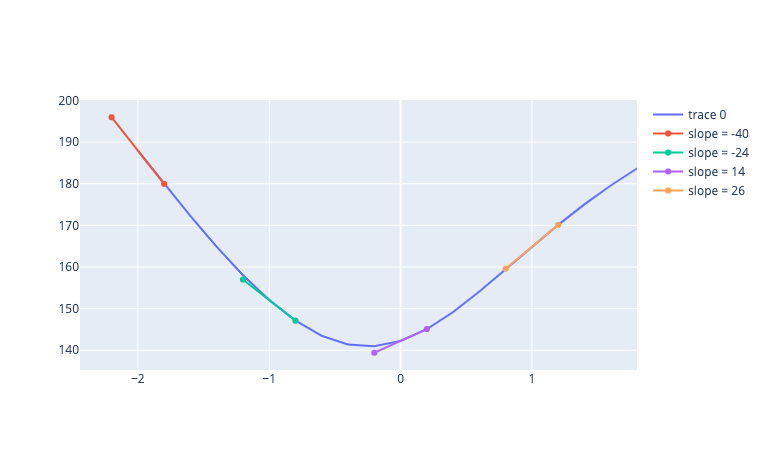

In [63]:
import json
import plotly.graph_objects as go
with open('cost_curve_slopes.json') as cost_curve_slopes_file:
    data = json.load(cost_curve_slopes_file)
go.Figure(data)

What the plot above illustrates is the following:
* As we are far away from our cost curve's minimum, the cost curve tends to be steeper.  
* And as we approach the minimum of the cost curve, our cost curve flattens out.

So if we just choose a random parameter, say where $w_1 = -2$ (where our red line is), we can try our next guess by calculating the slope of the cost curve at that point.  And in general, the steeper the slope, the further we are from the minimum and thus the larger a step we should take to reach our minimum.  The shallower the slope, the less steep a step we should take.

Let's try this out.  We'll start at the point $w_1 = -2$.  We calculate the slope and get the following:

In [67]:
w_1 = -2

def slope_at(point_one, point_two):
    return (point_two[1] - point_one[1])/((point_two[0] - point_one[0]))

def sse_slope(w_1):
    delta_x = .01
    w_2 = w_1 + delta_x
    y1 = sum_of_squared_errors(paired_data, w_1)
    y2 = sum_of_squared_errors(paired_data, w_1 + delta_x)
    slope = slope_at([w_1, y1], [w_2, y2])
    return slope
slope = sse_slope(-2)
slope

-40.348880251849515

So our technique will be to change our weight in proportion to the slope at that point.

Let's take another look at our graph.  If we move by our weight, currently at $w_1 = -2$ by the slope we calculated so that:
$$w_1 = w_1 + slope\_at(w_1) = w_1 - 40$$

then we'll have two problems.  

* The first is that we're moving in the wrong direction -- we'll move in the negative direction where we should move into the positive direction.  So to fix this, we'll move in the negative direction of the slope.

* But even if we move by +40, we're still changing our parameter way too much.  To avoid this we'll only move by a fraction of the slope.  So our formula will be $w_1 = w_1 + .01*slope$

With these two techniques, we can move in the correct direction without overshooting our minimum.

In [69]:
learning_rate = .01
next_w_1 = w_1 + -learning_rate*rss_slope(-2)
next_w_1

-1.596511197481505

Ok, now instead of making one update to our initial parameter, let's repeat this technique multiple times.

In [80]:
import pandas as pd
df = pd.read_csv('cell_data.csv')
areas = df['mean_area']
targets = df['is_cancerous']
paired_data = list(zip(areas, targets))

def sum_of_squared_errors(paired_data, w_1):
    return sum([(target - sigma(z(feature, w_1)))**2 for (feature, target) in paired_data])

In [76]:
smart_weights = [-2]
learning_rate = .01
for idx in range(0, 10):
    new_weight = (smart_weights[-1] - learning_rate*rss_slope(smart_weights[-1]))
    smart_weights.append(new_weight)

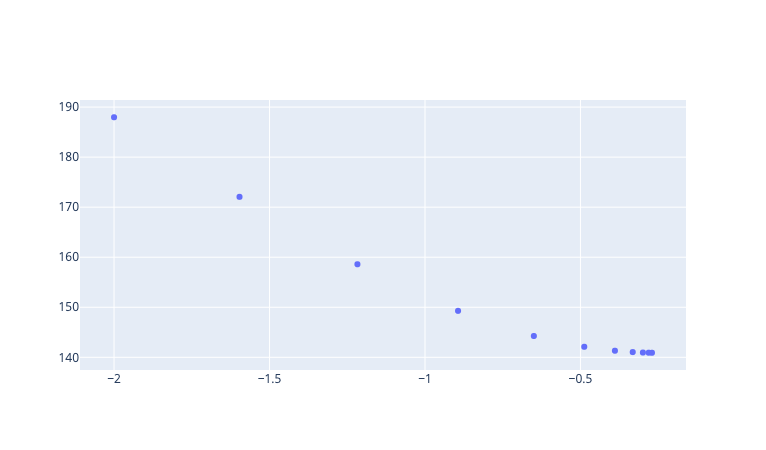

In [78]:
sse_smart = [sum_of_squared_errors(paired_data, weight) for weight in smart_weights]
go.Figure(go.Scatter(x = smart_weights, y = sse_smart, mode = 'markers'))

So notice that in just 10 steps we were able to come quite close to finding the parameter that minimizes the cost curve.

In [82]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(fit_intercept=False)

areas = df[['mean_area']]
targets = df['is_cancerous']
log_model.fit(areas, targets)
log_model.coef_

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



array([[-0.26729649]])

### Summary

In this lesson we saw how we can use a cost curve to train a neural network.  

In [ ]:
* Perhaps prescale the areas